# Bank Marketing Data Analysis
This notebook presents an analysis of the `bankmarketing.csv` dataset, which includes data related to a bank's marketing campaigns. The main goal is to understand customer behavior and predict whether a client will subscribe to a term deposit.

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:

import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/skill1/bankmarketing.csv')

# Display the first few rows
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [24]:

# Check for missing values and data types
df.isnull().sum()

print(df['age'].value_counts())
print(df['job'].value_counts())
print(df['marital'].value_counts())
print(df['education'].value_counts())
print(df['default'].value_counts())
print(df['housing'].value_counts())
print(df['loan'].value_counts())
print(df['contact'].value_counts())
print(df['month'].value_counts())
print(df['day_of_week'].value_counts())
print(df['duration'].value_counts())
print(df['campaign'].value_counts())
print(df['pdays'].value_counts())
print(df['previous'].value_counts())
print(df['poutcome'].value_counts())
print(df['emp.var.rate'].value_counts())
print(df['cons.price.idx'].value_counts())
print(df['cons.conf.idx'].value_counts())
print(df['euribor3m'].value_counts())
print(df['nr.employed'].value_counts())
print(df['y'].value_counts())


age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: count, 

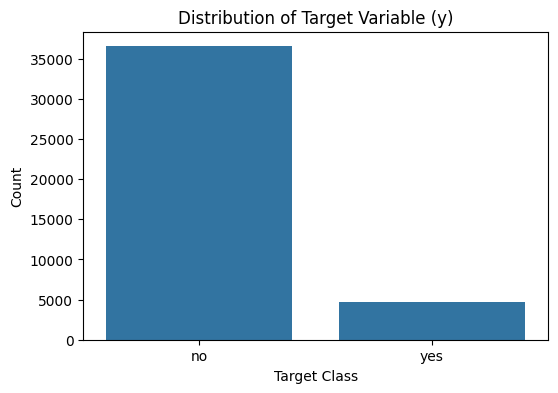

In [25]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable

plt.figure(figsize=(6,4))
sns.countplot(x=df['y'], data=df)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()


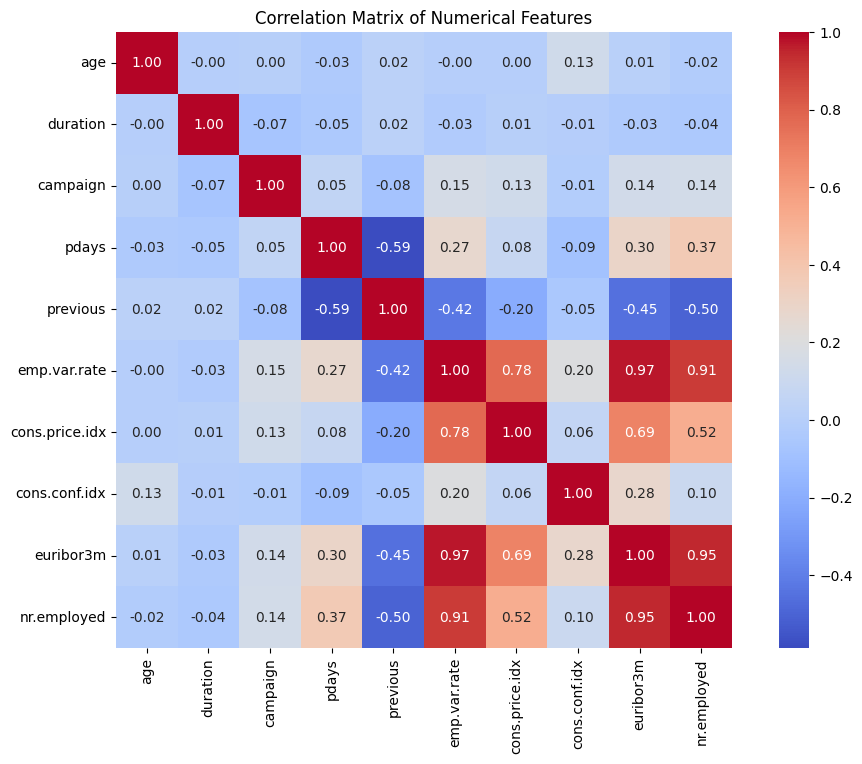

In [26]:

# Correlation matrix for numerical features

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate correlation matrix
corr_matrix = df[numerical_features].corr()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [27]:
# Summary statistics

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [28]:
#Removing irrelevant columns and values

df = df[(df['age']>=17) & (df['age']<=80)]
df = df[df['education']!='illiterate']

dur = df['duration'].value_counts()
dura = dur[dur>10].index
df = df[df['duration'].isin(dura)]

prev = df['previous'].value_counts()
pre = prev[prev>10].index
df = df[df['previous'].isin(pre)]

comp = df['campaign'].value_counts()
com = comp[comp>10].index
df = df[df['campaign'].isin(com)]

df = df.drop(['pdays', 'poutcome', 'default', 'nr.employed'], axis=1)

In [30]:
# Label encoding for categorical variables

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'y']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

for col in ['job', 'marital', 'education', 'housing', 'loan']:
    df[col] = df[col].replace('unknown', df[col].mode()[0])


In [32]:
#Scaling and splitting the data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = df.drop('y', axis=1)
y = df['y']
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [33]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression:
Accuracy: 0.8479062417698183
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91      6960
           1       0.34      0.89      0.50       634

    accuracy                           0.85      7594
   macro avg       0.67      0.87      0.70      7594
weighted avg       0.93      0.85      0.88      7594

Confusion Matrix:
 [[5872 1088]
 [  67  567]]


In [34]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(n_estimators=300, random_state=42)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)

print("Gradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Gradient Boosting:
Accuracy: 0.9342902291282591
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      6960
           1       0.63      0.50      0.56       634

    accuracy                           0.93      7594
   macro avg       0.79      0.74      0.76      7594
weighted avg       0.93      0.93      0.93      7594

Confusion Matrix:
 [[6775  185]
 [ 314  320]]


In [35]:
# XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=500,
    max_depth=3,
    learning_rate=0.04,
    scale_pos_weight=1.3,
    random_state=42,
    colsample_bytree=1,
    subsample=1
)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

XGBoost:
Accuracy: 0.9377139847247827
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      6960
           1       0.64      0.59      0.61       634

    accuracy                           0.94      7594
   macro avg       0.80      0.78      0.79      7594
weighted avg       0.94      0.94      0.94      7594

Confusion Matrix:
 [[6748  212]
 [ 261  373]]


In [36]:
#AUC Score and Cross value score

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

print("ROC AUC Score (XGBoost):", roc_auc_score(y_test, xgb.predict_proba(x_test)[:, 1]))
print("ROC AUC Score (Logistic Regression):", roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1]))
print("ROC AUC Score (Gradient Boosting):", roc_auc_score(y_test, gbr.predict_proba(x_test)[:, 1]))

print("====================================")

print("Cross-Validation Scores (XGBoost):", cross_val_score(xgb, x_test, y_test, cv=5))
print("Cross-Validation Scores (Logistic Regression):", cross_val_score(lr, x_test, y_test, cv=5))
print("Cross-Validation Scores (Gradient Boosting):", cross_val_score(gbr, x_test, y_test, cv=5))

ROC AUC Score (XGBoost): 0.9559513125929149
ROC AUC Score (Logistic Regression): 0.9334321403966787
ROC AUC Score (Gradient Boosting): 0.9555217511512382
Cross-Validation Scores (XGBoost): [0.93811718 0.93350889 0.9361422  0.9315339  0.93741765]
Cross-Validation Scores (Logistic Regression): [0.84463463 0.84002633 0.85714286 0.85121791 0.86363636]
Cross-Validation Scores (Gradient Boosting): [0.93285056 0.93021725 0.93285056 0.93416722 0.93083004]


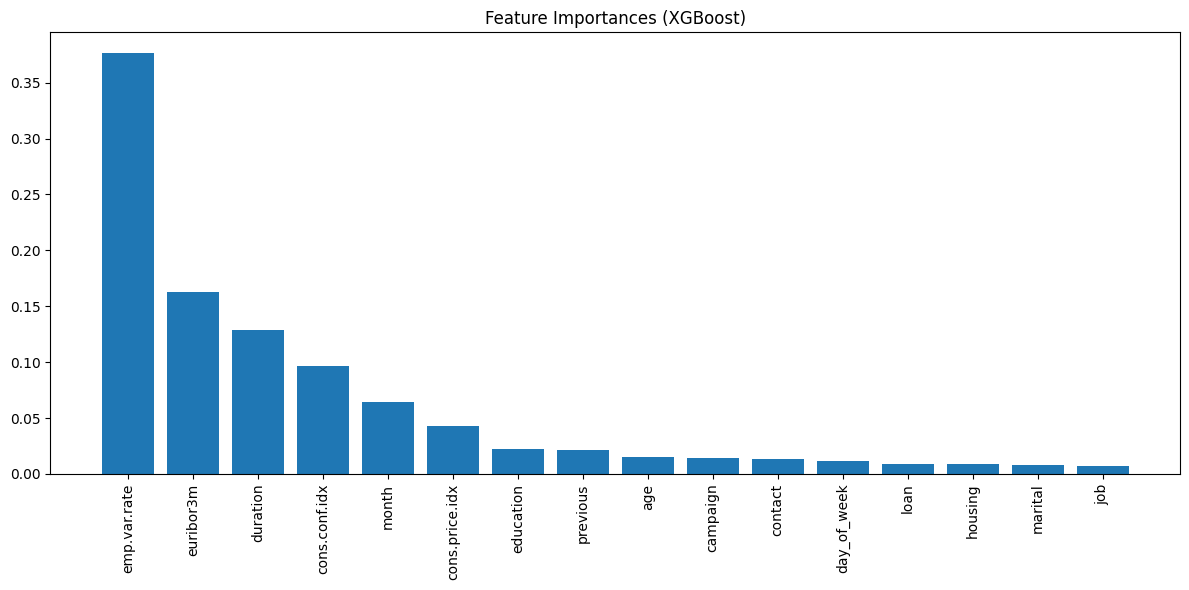


Sorted Feature Importances:
emp.var.rate: 0.3762
euribor3m: 0.1624
duration: 0.1290
cons.conf.idx: 0.0963
month: 0.0645
cons.price.idx: 0.0425
education: 0.0219
previous: 0.0210
age: 0.0153
campaign: 0.0138
contact: 0.0130
day_of_week: 0.0118
loan: 0.0088
housing: 0.0087
marital: 0.0077
job: 0.0071


In [37]:
#Feature Importance

import matplotlib.pyplot as plt
import numpy as np

features = df.drop('y', axis=1).columns.tolist()

importances = xgb.feature_importances_

indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances (XGBoost)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

print("\nSorted Feature Importances:")
for i in indices:
    print(f"{features[i]}: {importances[i]:.4f}")

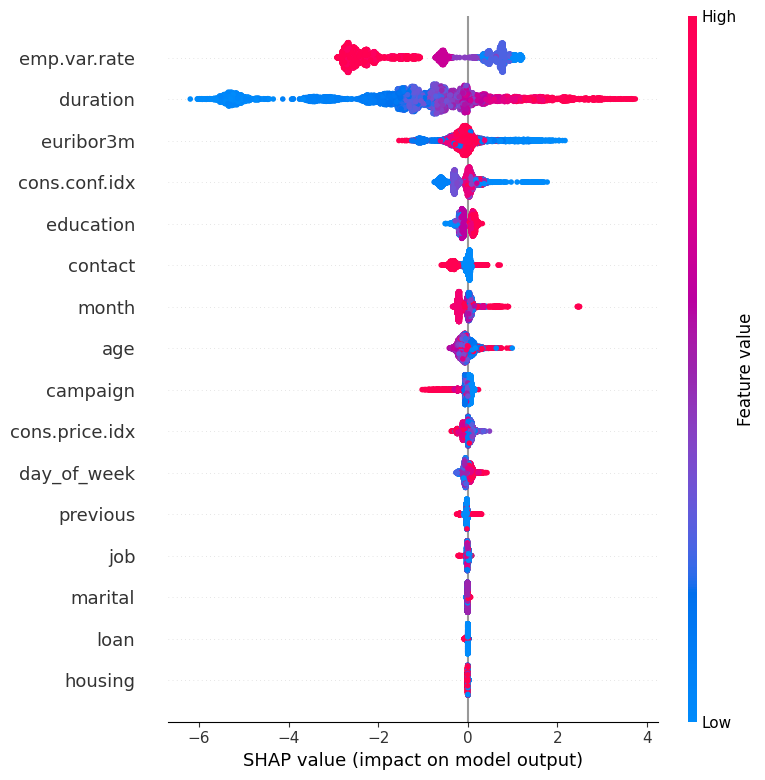

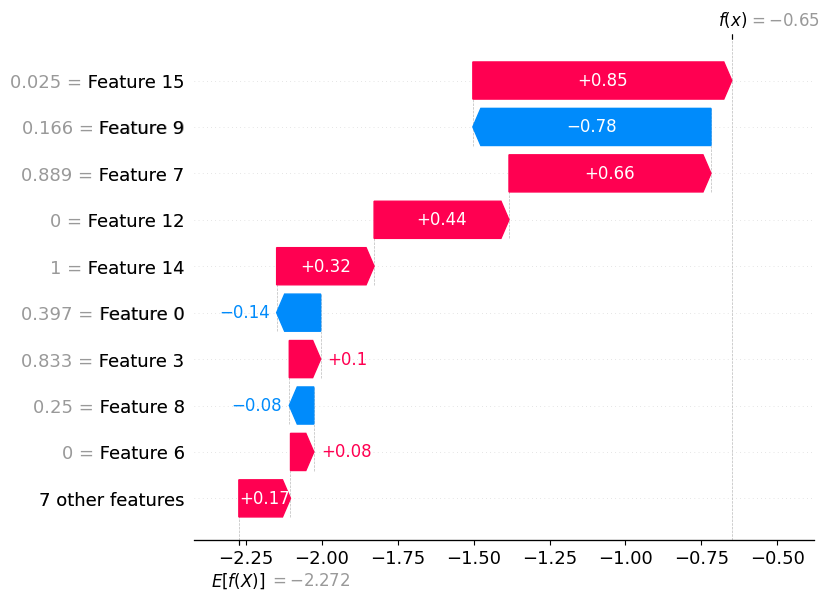

In [38]:
#SHAP values

import shap
explainer = shap.Explainer(xgb)
shap_values = explainer(x_test)
shap.summary_plot(shap_values, features=x_test, feature_names=features)
shap.plots.waterfall(shap_values[0])


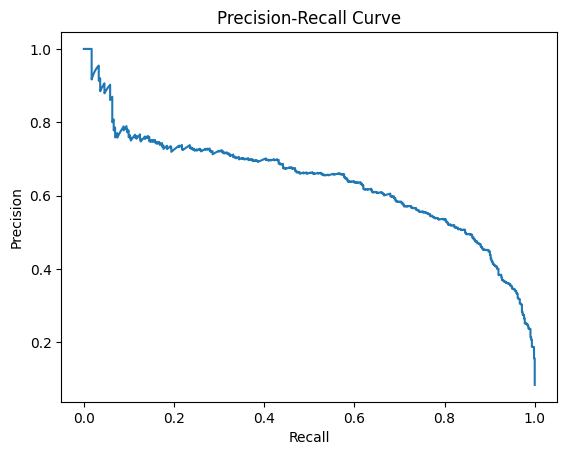

In [39]:
#Precision Recall Curve

from sklearn.metrics import precision_recall_curve, auc

probs = xgb.predict_proba(x_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)
pr_auc = auc(recall, precision)

plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


In [41]:
#Dumping and Downloading the model

import joblib
joblib.dump(xgb, 'xgb.pkl')
joblib.dump(scaler, 'scaler_.pkl')

from google.colab import files
files.download('xgb.pkl')
files.download('scaler_.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


## Conclusion

In this analysis, we explored the structure and composition of the bank marketing dataset. Key takeaways include:

- The dataset includes customer demographics and contact details, which can be useful for segmentation.
- A majority of customers do not subscribe to term deposits, indicating an imbalanced dataset.
- Further preprocessing, feature engineering, and modeling would be the next steps for predictive analysis.

This initial inspection sets the foundation for a deeper analysis or machine learning workflow to improve marketing effectiveness.
